In [1]:
dataset_directory = '../dataset'
validation_directory = dataset_directory + '/validation'
train_directory = dataset_directory + '/train'

In [2]:
from keras.utils import image_dataset_from_directory

image_size = (256, 256)

train_dataset = image_dataset_from_directory(
    train_directory,
    label_mode = 'categorical',
    image_size = image_size,
    batch_size = 16,
    shuffle = True
)

validation_dataset = image_dataset_from_directory(
    validation_directory,
    label_mode = 'categorical',
    image_size = image_size,
    batch_size = 16,
    shuffle = True
)

Found 17208 files belonging to 3 classes.
Found 1000 files belonging to 3 classes.


In [3]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [4]:
from keras.models import Sequential
from keras.layers import InputLayer, Rescaling, RandomFlip, RandomRotation, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.initializers import he_normal

model = Sequential(
    [

        InputLayer(input_shape=image_size + (3,)),
        Rescaling(1./255),

        RandomFlip('horizontal_and_vertical'),
        RandomRotation(factor=0.4, fill_mode='wrap'),

        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),        
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),        
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),     
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),    
        Conv2D(32, (3, 3), padding = 'same', kernel_initializer=he_normal(), activation='elu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Flatten(),

        Dense(64, activation='elu', kernel_initializer=he_normal()),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='elu', kernel_initializer=he_normal()),
        BatchNormalization(),
        Dropout(0.2),

        Dense(3, activation='softmax')
    ]
)

In [5]:
from keras.optimizers import Adam

model.compile (
    optimizer = Adam(),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [6]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath = '../models/my-model.keras',
    monitor ='val_categorical_accuracy',
    verbose = True,
    save_best_only = True,
    save_weights_only=False,
    mode = 'max'
)

In [7]:
history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks = [checkpoint]
)

Epoch 1/30
1076/1076 [==============================] - ETA: 0s - loss: 0.3577 - categorical_accuracy: 0.8676
Epoch 1: val_categorical_accuracy improved from -inf to 0.77000, saving model to ../models\my-model.keras
1076/1076 [==============================] - 259s 229ms/step - loss: 0.3577 - categorical_accuracy: 0.8676 - val_loss: 0.5554 - val_categorical_accuracy: 0.7700
Epoch 2/30
1076/1076 [==============================] - ETA: 0s - loss: 0.2493 - categorical_accuracy: 0.9112
Epoch 2: val_categorical_accuracy improved from 0.77000 to 0.83400, saving model to ../models\my-model.keras
1076/1076 [==============================] - 259s 240ms/step - loss: 0.2493 - categorical_accuracy: 0.9112 - val_loss: 0.4777 - val_categorical_accuracy: 0.8340
Epoch 3/30
1076/1076 [==============================] - ETA: 0s - loss: 0.2182 - categorical_accuracy: 0.9215
Epoch 3: val_categorical_accuracy improved from 0.83400 to 0.89800, saving model to ../models\my-model.keras
1076/1076 [=============

In [8]:
from keras.models import load_model
model = load_model('../models/my-model.keras')

1/1 [==============================] - 0s 40ms/step


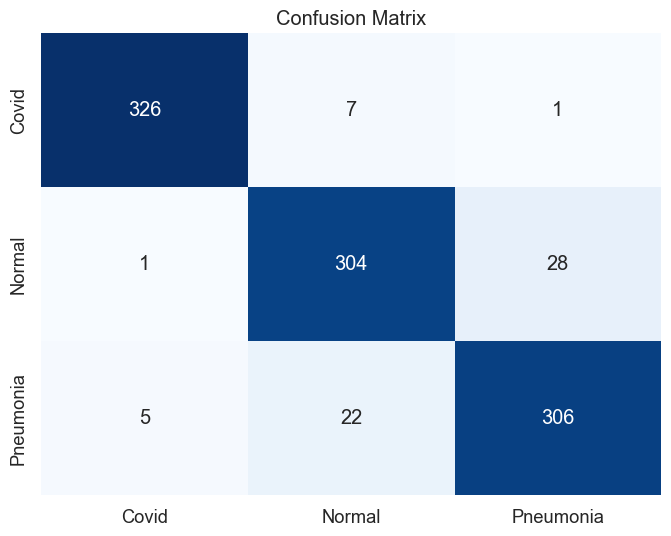

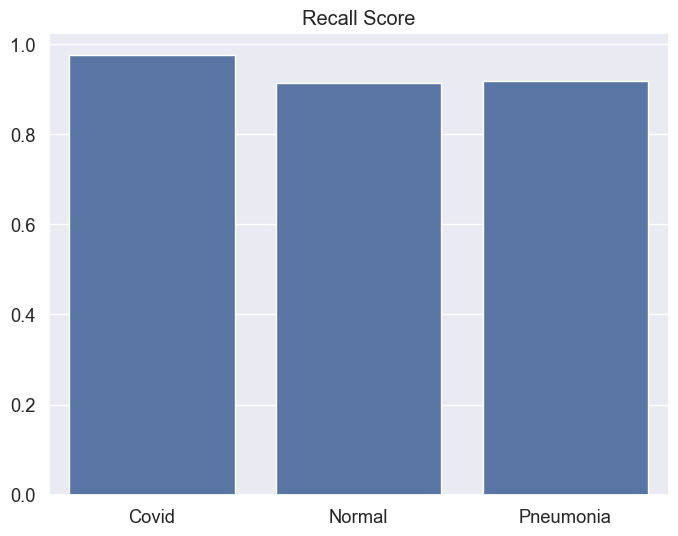

Covid: 0.9760
Normal: 0.9129
Pneumonia: 0.9189


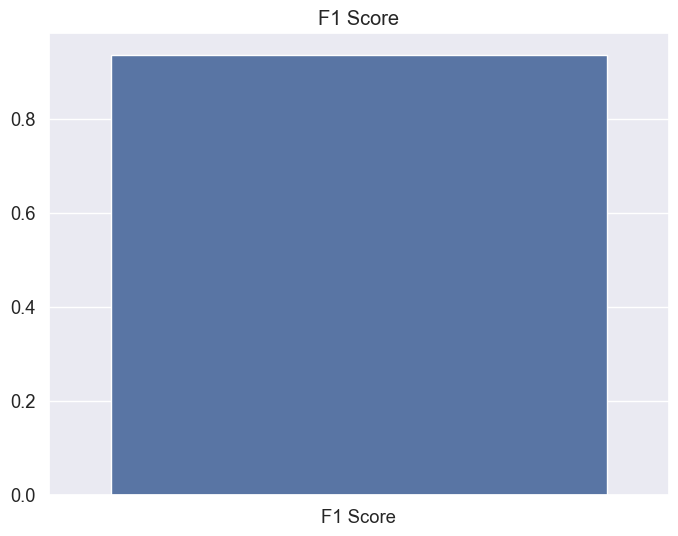

F1-Score: 0.9360


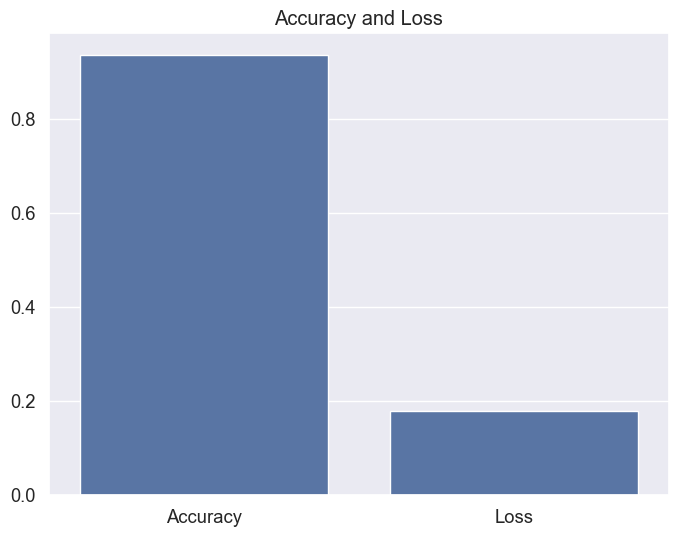

Accuracy: 0.9360 | Loss: 0.1778


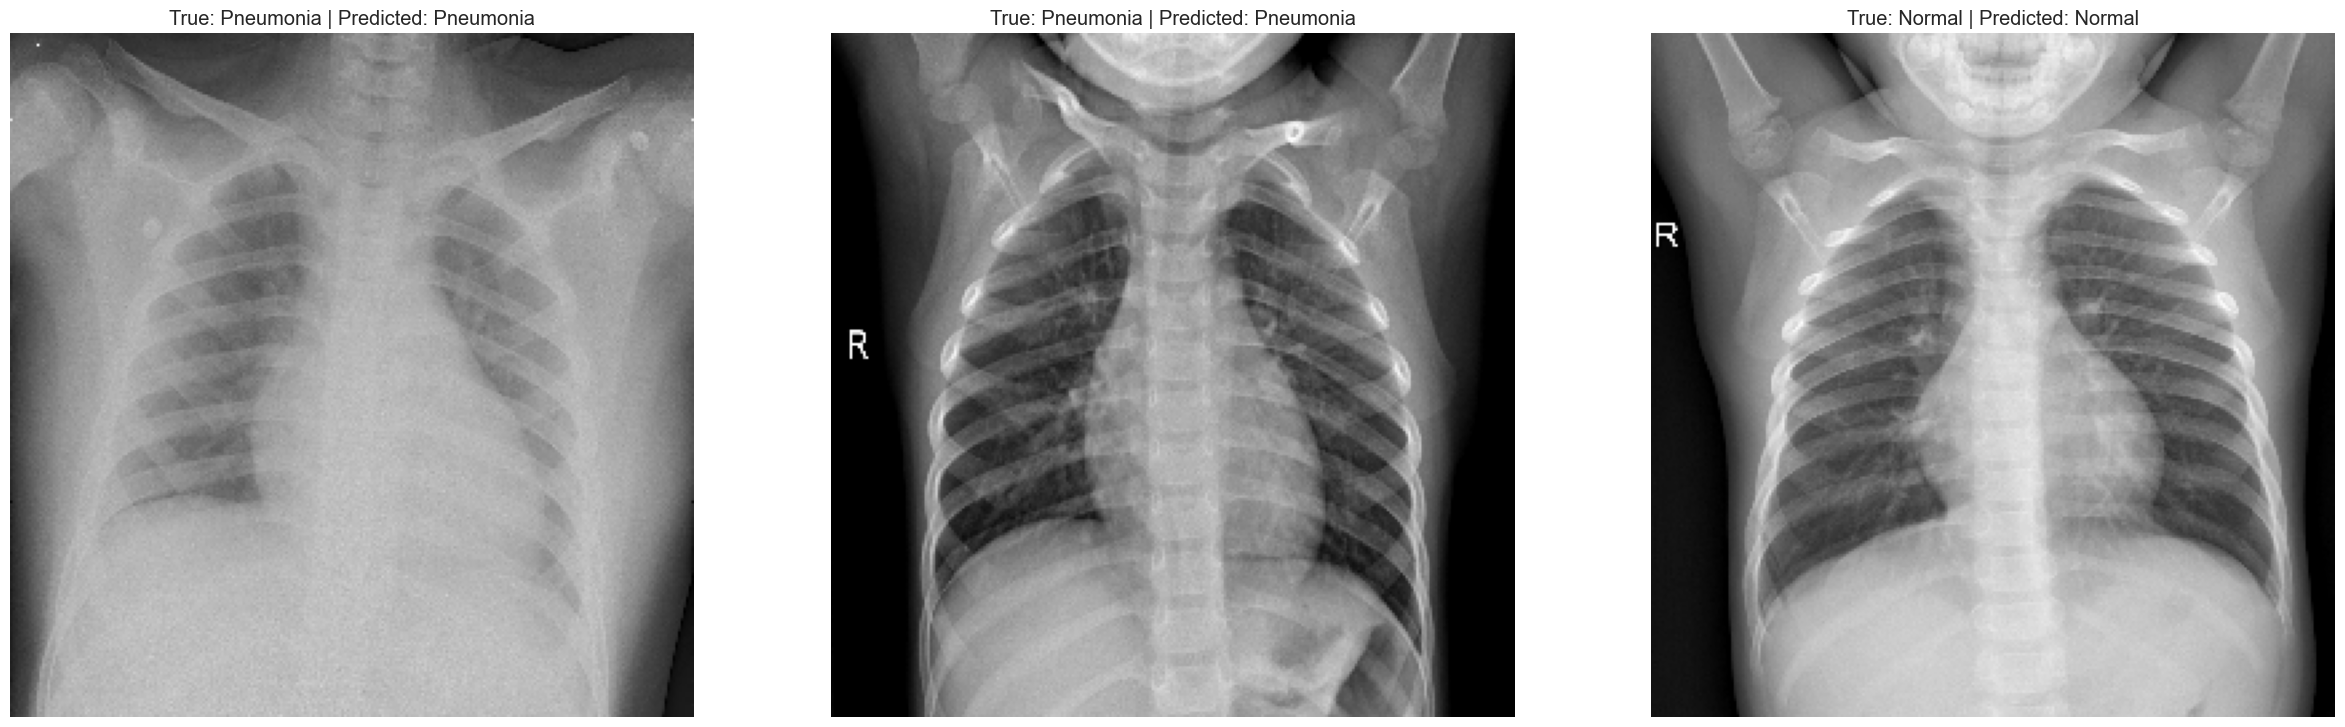

In [9]:
from utils.evaluate_model import evaluate_model
evaluate_model(model, validation_dataset)